In [1]:
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn import masking as nimask
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import math 
import os

In [6]:
clean_path = f'data.nosync/clean/NYU'
file_list = os.listdir(clean_path)

In [7]:
file_list.remove('.DS_Store')

In [12]:
means_pr_roi = []
var_pr_roi = []


for subject in tqdm(file_list): #For each subject
    subject_means = {}
    subject_variance = {}

    subject_means['subject'] = subject
    subject_variance['subject'] = subject
   
    subject = np.load(f'data.nosync/clean/NYU/{subject}')
    for i in subject.files: #For each ROI
        roi = subject[i]
        values = []
        #Get all values from each timestep
        for t in range(roi.shape[0]):
            values += roi[t].tolist()
        #Calculate mean and variance           
        subject_means[i] = sum(values)/len(values)
        subject_variance[i] = np.var(values)

    #Append to list
    means_pr_roi.append(subject_means)
    var_pr_roi.append(subject_variance)

100%|██████████| 395/395 [02:16<00:00,  2.90it/s]


In [13]:
#save stats
means_pr_roi = pd.DataFrame(means_pr_roi)
means_pr_roi.to_csv('data.nosync/stats/mean_subject.csv', sep= ";")

var_pr_roi = pd.DataFrame(var_pr_roi)
var_pr_roi.to_csv('data.nosync/stats/variance_subject.csv', sep= ";")


In [31]:
var_pr_roi['ROI_1'][var_pr_roi['ROI_1']>2].describe()

count     3.000000
mean     20.537873
std      31.272077
min       2.018199
25%       2.484942
50%       2.951686
75%      29.797710
max      56.643735
Name: ROI_1, dtype: float64

In [33]:
var_pr_roi[var_pr_roi['ROI_1']>2]

,subject,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7
171,sfnwmrda0010077_session_1_rest_2.npz,2.018199,1.320290,1.830056,1.184891,1.797533,1.819504,1.760971
183,sfnwmrda1023964_session_1_rest_2.npz,56.643735,33.571468,34.131812,33.502569,27.563038,25.537749,35.815922
212,sfnwmrda0010111_session_1_rest_1.npz,2.951686,2.051688,2.591874,2.321350,13.845806,8.580765,7.663774


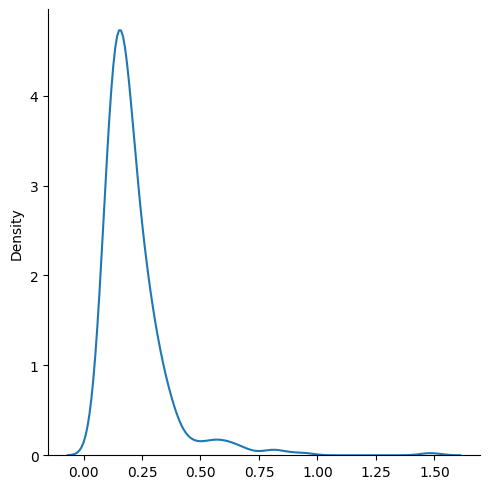

In [32]:
sns.displot(var_pr_roi['ROI_1'][var_pr_roi['ROI_1']<2].to_list(), kind= 'kde')